In [3]:
import pandas as pd
data = pd.read_csv(r"D:\PyHack-PyAITM-PyHack04-main\PyHack-PyAITM-PyHack04-main\Final Project\updated_file.csv")

In [4]:
print(data.dtypes)

URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
label                           int64
dtype: object


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib  # For saving the model for later use


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib


# Creating label encoders for each column
url_encoder = LabelEncoder()
domain_encoder = LabelEncoder()
tld_encoder = LabelEncoder()

# Fitting the encoders and transforming the data
data['EncodedURL'] = url_encoder.fit_transform(data['URL'])
data['EncodedDomain'] = domain_encoder.fit_transform(data['Domain'])
data['EncodedTLD'] = tld_encoder.fit_transform(data['TLD'])

import pickle

# Save the encoders and feature names as .pkl files
with open('url_encoder.pkl', 'wb') as file:
    pickle.dump(url_encoder, file)

with open('domain_encoder.pkl', 'wb') as file:
    pickle.dump(domain_encoder, file)

with open('tld_encoder.pkl', 'wb') as file:
    pickle.dump(tld_encoder, file)

#with open('feature_order.pkl', 'wb') as file:
#    pickle.dump(X.columns.tolist(), file)  # Save the feature names


# Optionally drop the original text columns if they are no longer needed
data.drop(['URL', 'Domain', 'TLD'], axis=1, inplace=True)

# Save the new dataset with encoded values
data.to_csv('encoded_dataset.csv', index=False)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
data = pd.read_csv(r"D:\PyHack-PyAITM-PyHack04-main\PyHack-PyAITM-PyHack04-main\Final Project\Data\encoded_dataset.csv")

In [42]:
print(data.dtypes)

URLLength                       int64
DomainLength                    int64
IsDomainIP                      int64
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
target                          int64
EncodedURL                      int64
EncodedDomain                   int64
EncodedTLD                      int64
dtype: object


In [43]:
feature_order = ['EncodedURL', 'EncodedDomain', 'EncodedTLD', 'URLLength', 'DomainLength', 'IsDomainIP', 
                         'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 
                         'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 
                         'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 
                         'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 
                         'SpacialCharRatioInURL', 'IsHTTPS']
X = data[feature_order]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9998939756992302
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' and 'y' are your features and target variable respectively
X = data.drop(['target'], axis=1)  # Update this if your features are named differently
y = data['target']

# Initialize the RandomForest model
model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the average and standard deviation of the cross-validation scores
print("Average CV Score: {:.2f}".format(cv_scores.mean()))
print("Standard Deviation of CV Scores: {:.2f}".format(cv_scores.std()))


Average CV Score: 1.00
Standard Deviation of CV Scores: 0.00


In [46]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' and 'y' are your features and target variable respectively
X = data.drop(['target'], axis=1)  # Update this if your features are named differently
y = data['target']

# Initialize the RandomForest model
model = RandomForestClassifier()

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Print the results for each metric
print("CV Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std() * 2))
print("CV Precision: %0.2f (+/- %0.2f)" % (cv_results['test_precision'].mean(), cv_results['test_precision'].std() * 2))
print("CV Recall: %0.2f (+/- %0.2f)" % (cv_results['test_recall'].mean(), cv_results['test_recall'].std() * 2))
print("CV F1 Score: %0.2f (+/- %0.2f)" % (cv_results['test_f1'].mean(), cv_results['test_f1'].std() * 2))


CV Accuracy: 1.00 (+/- 0.00)
CV Precision: 1.00 (+/- 0.00)
CV Recall: 1.00 (+/- 0.00)
CV F1 Score: 1.00 (+/- 0.00)


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

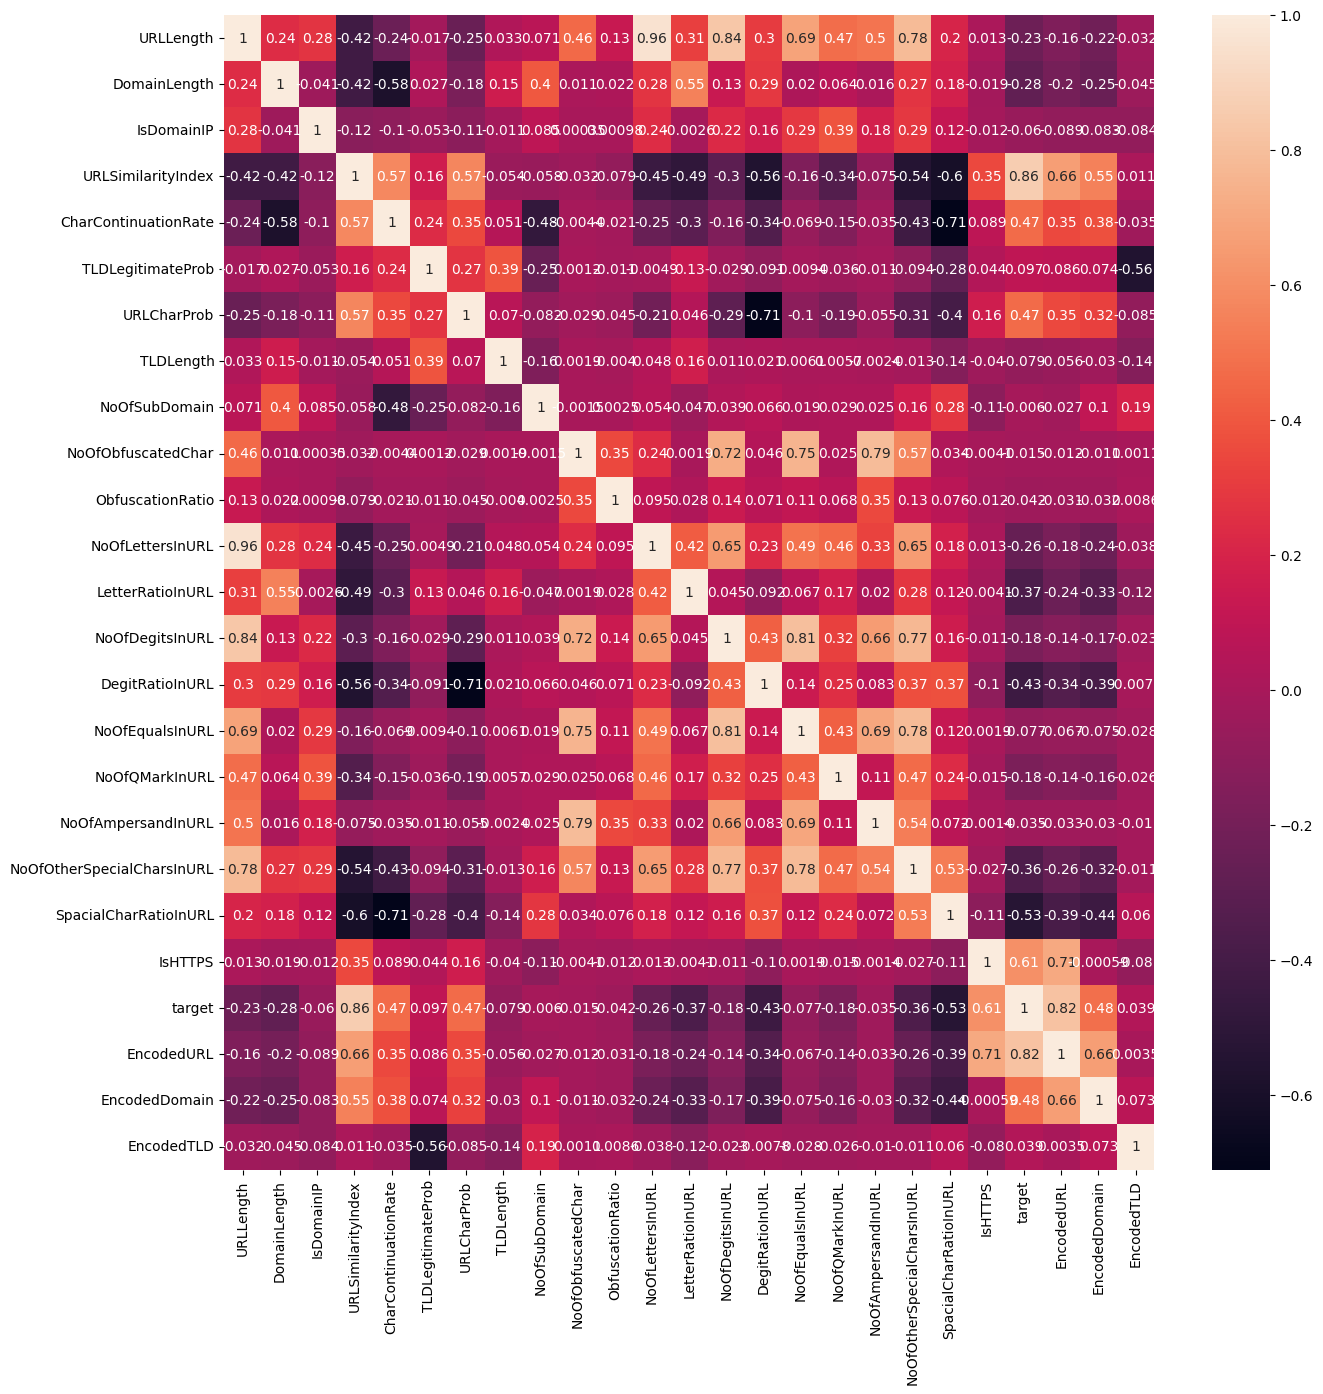

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

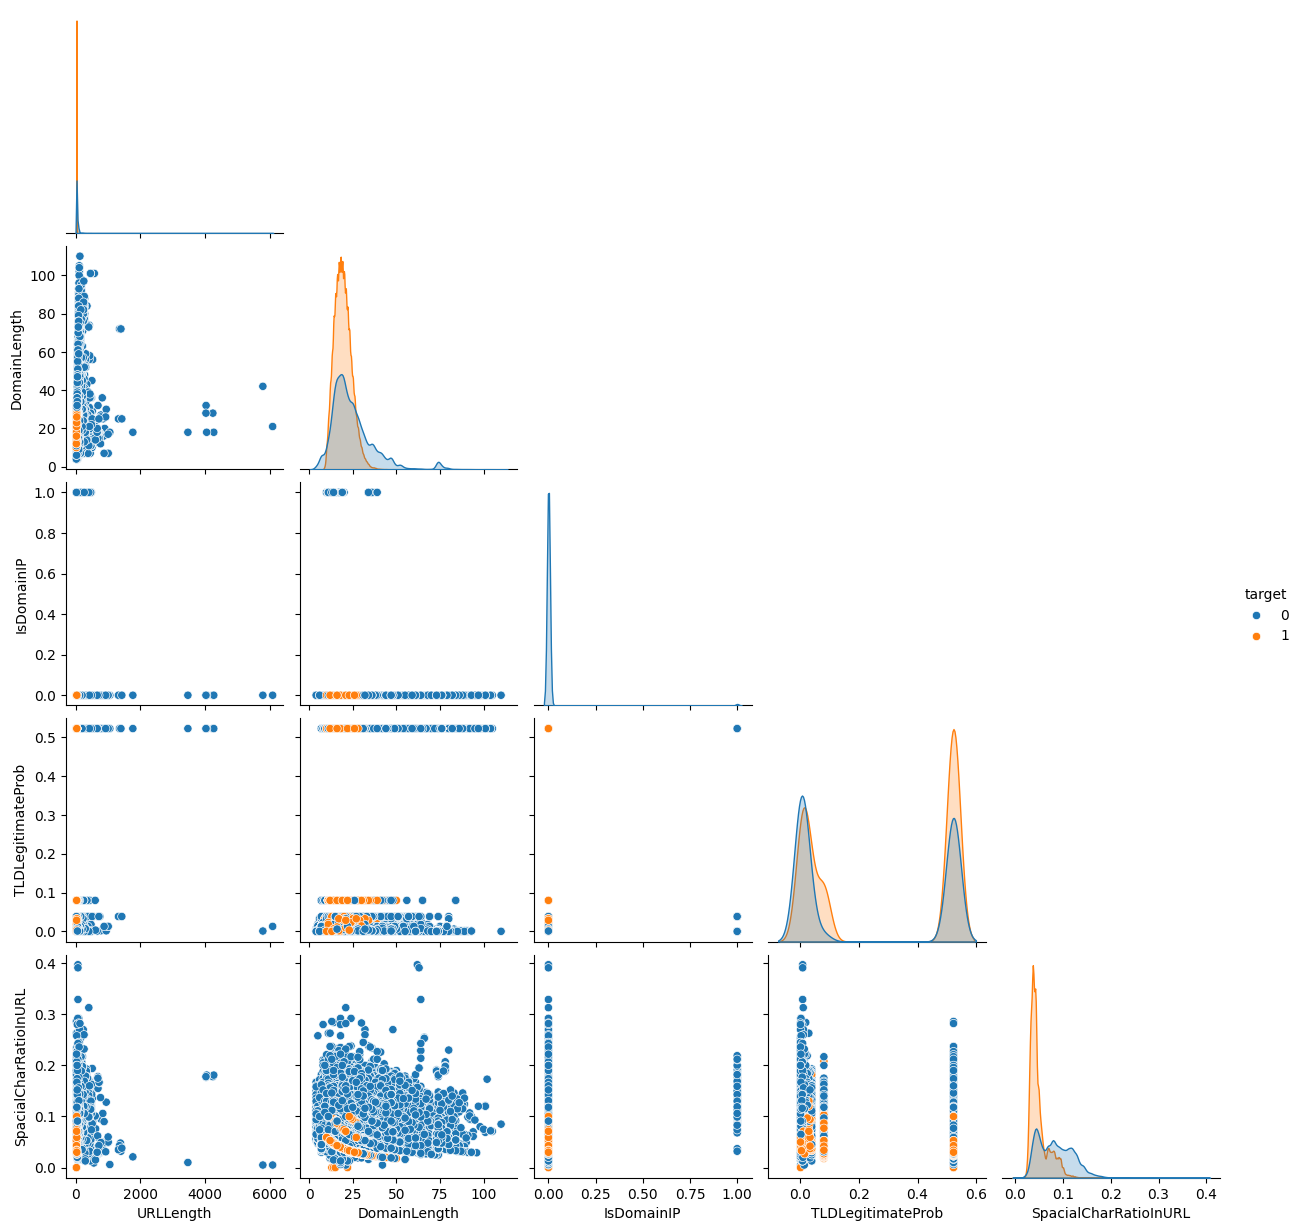

In [49]:
df = data[['URLLength', 'DomainLength', 'IsDomainIP', 'TLDLegitimateProb', 'SpacialCharRatioInURL', 'target']]

# Plotting with Seaborn's pairplot to visualize the relationships between features and class distribution
sns.pairplot(data=df, hue="target", corner=True)

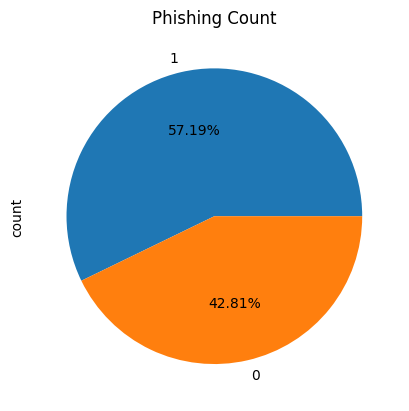

In [16]:
data['target'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((188636, 24), (188636,), (47159, 24), (47159,))

In [51]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [52]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [54]:
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.996
Logistic Regression : Accuracy on test Data: 0.997

Logistic Regression : f1_score on training Data: 0.997
Logistic Regression : f1_score on test Data: 0.997

Logistic Regression : Recall on training Data: 0.998
Logistic Regression : Recall on test Data: 0.998

Logistic Regression : precision on training Data: 0.996
Logistic Regression : precision on test Data: 0.996


In [55]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [56]:
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [57]:
import pickle

# Assume `model` is your trained Logistic Regression model
with open('LogisticReg_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [17]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [19]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 1.000
K-Nearest Neighbors : Accuracy on test Data: 0.995

K-Nearest Neighbors : f1_score on training Data: 1.000
K-Nearest Neighbors : f1_score on test Data: 0.995

K-Nearest Neighborsn : Recall on training Data: 1.000
Logistic Regression : Recall on test Data: 0.999

K-Nearest Neighbors : precision on training Data: 1.000
K-Nearest Neighbors : precision on test Data: 0.992


In [20]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     20124
           1       0.99      1.00      1.00     27035

    accuracy                           0.99     47159
   macro avg       1.00      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



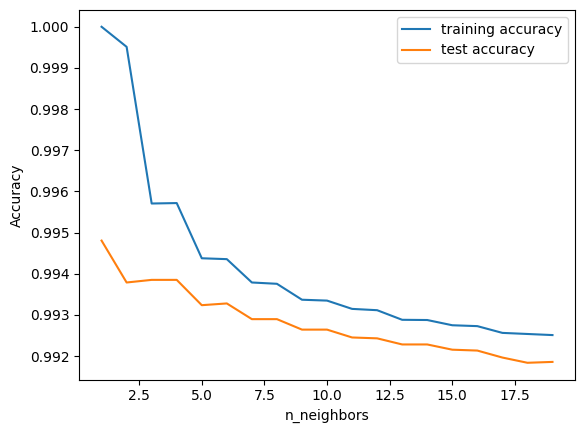

In [21]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

In [22]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [24]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [25]:
acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.993
Naive Bayes Classifier : Accuracy on test Data: 0.994

Naive Bayes Classifier : f1_score on training Data: 0.994
Naive Bayes Classifier : f1_score on test Data: 0.995

Naive Bayes Classifier : Recall on training Data: 0.999
Naive Bayes Classifier : Recall on test Data: 0.999

Naive Bayes Classifier : precision on training Data: 0.989
Naive Bayes Classifier : precision on test Data: 0.990


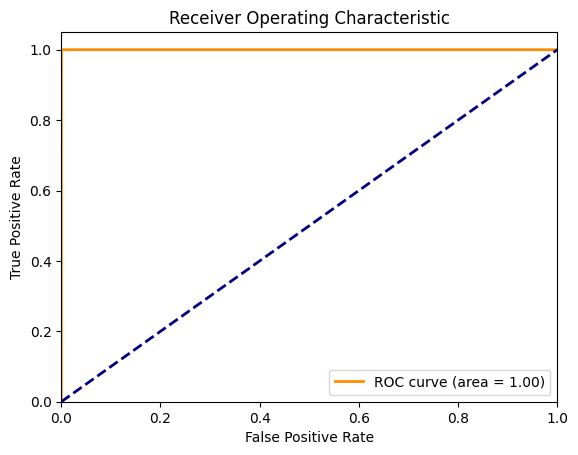

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prepare your data
X = data.drop('target', axis=1)  # Assuming 'data' is your DataFrame and 'target' is what you're predicting
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting probabilities
probs = model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


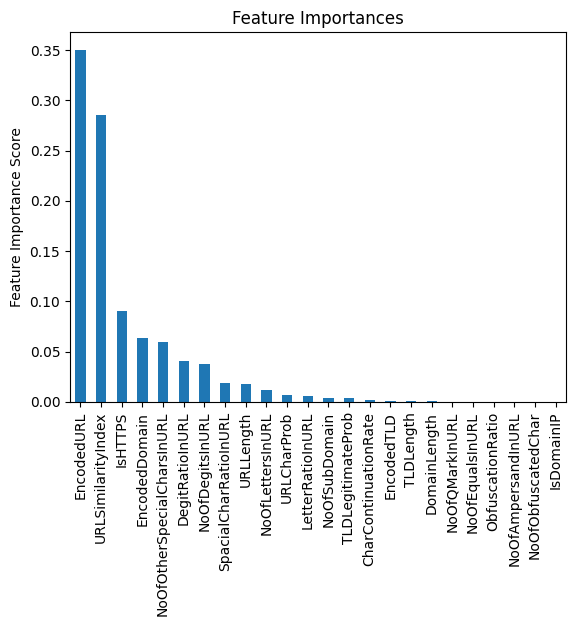

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()


In [28]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [29]:
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [30]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 1.000

Decision Tree : f1_score on training Data: 1.000
Decision Tree : f1_score on test Data: 1.000

Decision Tree : Recall on training Data: 1.000
Decision Tree : Recall on test Data: 1.000

Decision Tree : precision on training Data: 1.000
Decision Tree : precision on test Data: 1.000


In [31]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



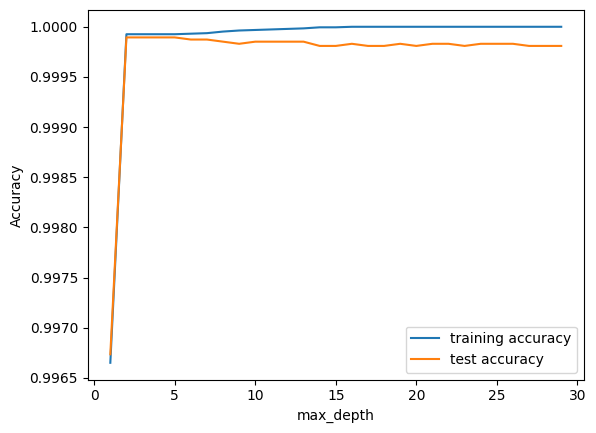

In [32]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Assuming X and y are your features and target variable
X = data.drop(['label'], axis=1)  # drop the target column to isolate features
y = data['label']

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=None)  # adjust parameters as needed

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)

# Print the results
print("CV Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


CV Scores: [0.99987277 0.99974555 0.99974555 0.99987277 0.99995759 0.99991518
 0.99974554 0.99978795 1.         0.99991518]
Average CV Score: 0.9998558073106052
Standard Deviation of CV Scores: 8.936246739543758e-05


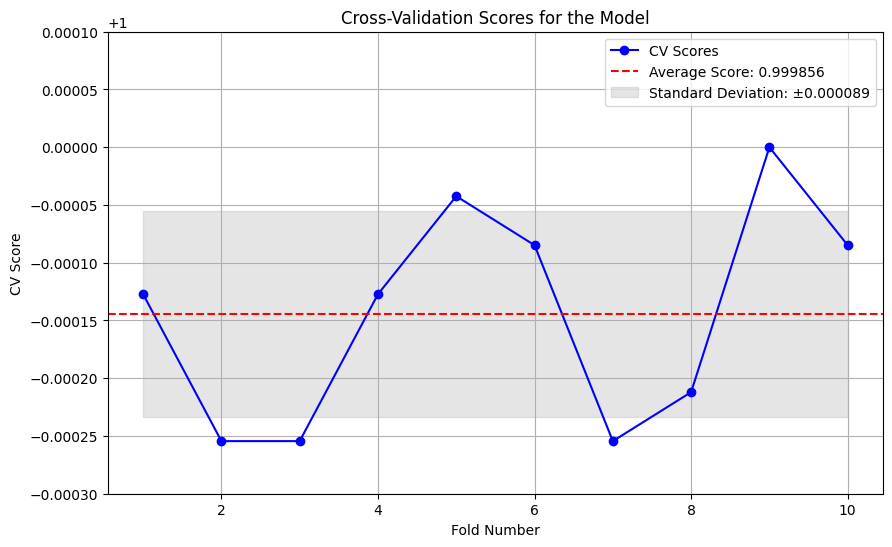

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Cross-validation scores data
cv_scores = [0.99987277, 0.99974555, 0.99974555, 0.99987277, 0.99995759, 
             0.99991518, 0.99974554, 0.99978795, 1.0, 0.99991518]

# Calculate the average and standard deviation
average_score = np.mean(cv_scores)
std_dev_score = np.std(cv_scores)

# Plotting the CV scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='CV Scores')
plt.axhline(average_score, color='r', linestyle='--', label=f'Average Score: {average_score:.6f}')
plt.fill_between(range(1, len(cv_scores) + 1), 
                 [average_score - std_dev_score] * len(cv_scores), 
                 [average_score + std_dev_score] * len(cv_scores), 
                 color='gray', alpha=0.2, label=f'Standard Deviation: ±{std_dev_score:.6f}')

# Adding labels and title
plt.xlabel('Fold Number')
plt.ylabel('CV Score')
plt.title('Cross-Validation Scores for the Model')
plt.legend()
plt.grid(True)
plt.ylim([0.9997, 1.0001])  # Set y-axis limits close to the range of scores for better visualization
plt.show()


In [35]:
import pickle

# Assume `model` is your trained Logistic Regression model
with open('decisionTree_model.pkl', 'wb') as file:
    pickle.dump(model, file)


---------------------------------------------------------------------------------------------------
FOR PPT
----------------------------------------------------------------------------------------------------

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [37]:
# Assuming you have already loaded your dataset into a DataFrame named 'data'
data = pd.read_csv("C:\\Users\\vishw\\Desktop\\Final Project\\Data\\encoded_dataset.csv")

# Define your features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

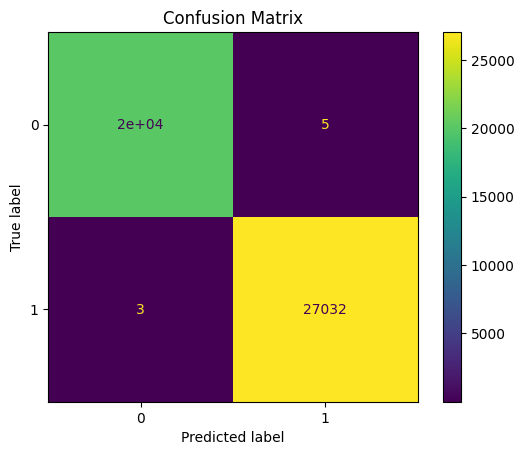

In [39]:
y_pred = model.predict(X_test)

# Calculate and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


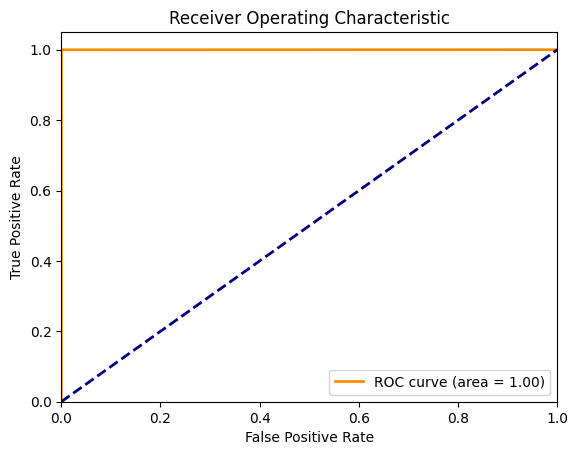

In [40]:
from sklearn.metrics import roc_curve, auc

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


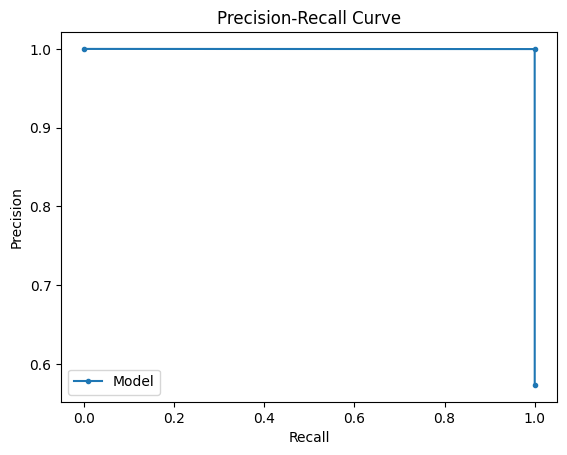

In [41]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, probs)

plt.figure()
plt.plot(recall, precision, marker='.', label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


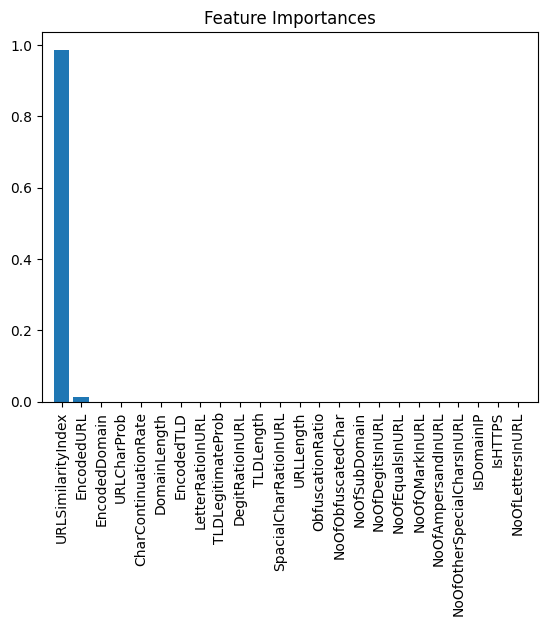

In [42]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_test.columns

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_test.shape[1]), importances[indices], align='center')
plt.xticks(range(X_test.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.show()


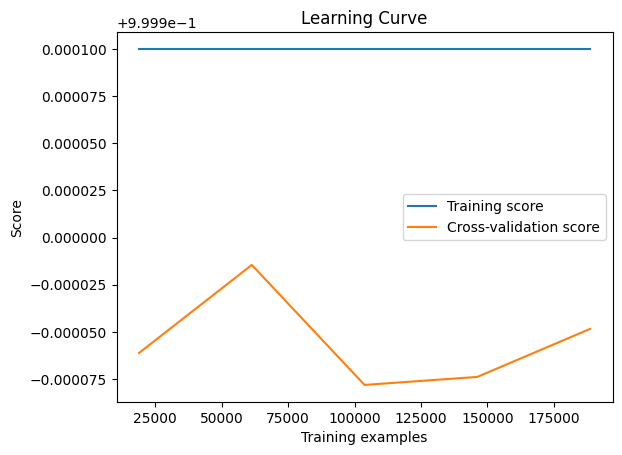

In [43]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


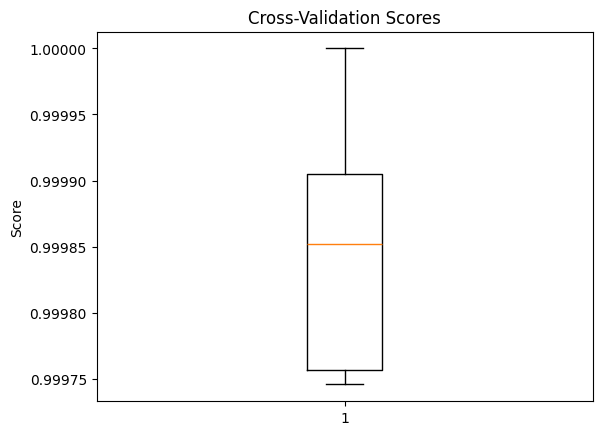

In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=10)
plt.figure()
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Score')
plt.show()


In [46]:
import seaborn as sns

df = pd.DataFrame(X)
df['target'] = y
sns.pairplot(df, hue='target')
plt.title('Pair Plot of Features')
plt.show()



KeyboardInterrupt



In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
scores = [0.96, 0.98, 0.94, 0.95]

plt.figure()
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.show()
